## PRÀCTICA XNDL

Abril Risso I Anna Casanovas

In [1]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [27]:
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

In [2]:
path_rain_data = "weatherAUS.csv"
rain_data = pd.read_csv(path_rain_data, header=0, delimiter=',')

In [3]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## ANÀLISI EXPLORATÒRIA DE DADES

In [4]:
rain_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
data = rain_data

In [8]:
data.shape
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## ANÀLISI UNIVARIANT DE VARIABLE NUMÈRIQUES I CATEGÒRIQUES

Number of numerical variables:  16
********************************************************************************
Numerical Variables Column:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Variable: MinTemp
  Mitjana: 12.19
  Desviació Estàndard: 6.40


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


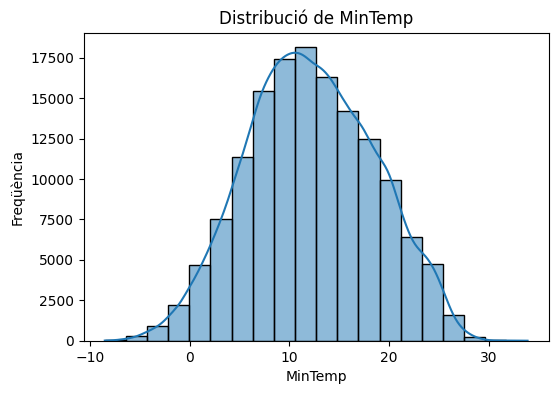

Variable: MaxTemp
  Mitjana: 23.22
  Desviació Estàndard: 7.12


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


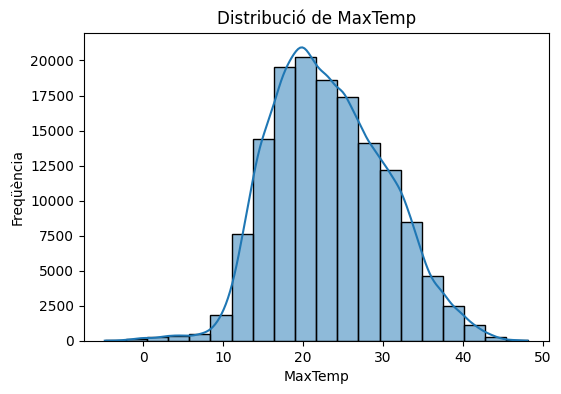

Variable: Rainfall
  Mitjana: 2.36
  Desviació Estàndard: 8.48


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


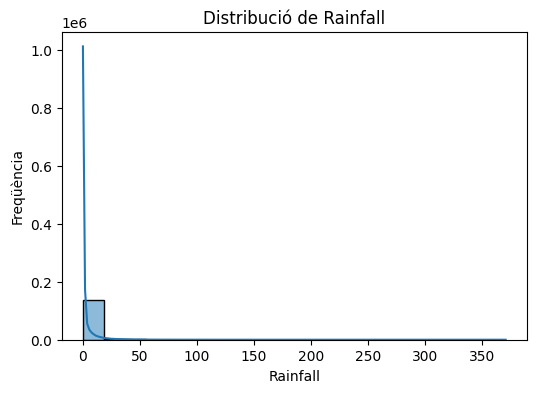

Variable: Evaporation
  Mitjana: 5.47
  Desviació Estàndard: 4.19


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


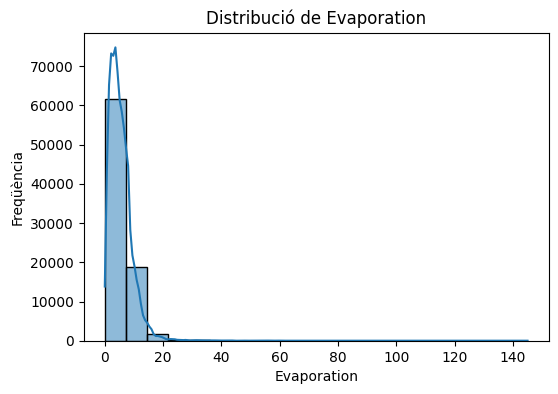

Variable: Sunshine
  Mitjana: 7.61
  Desviació Estàndard: 3.79


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


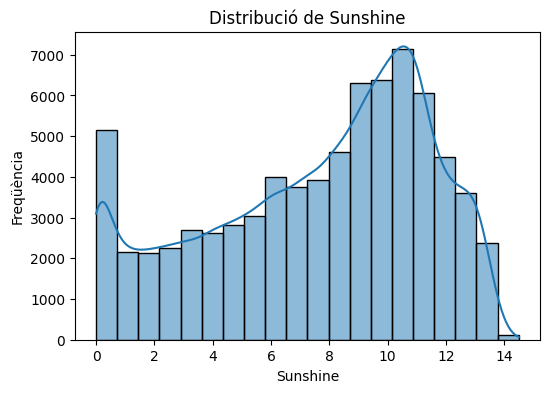

Variable: WindGustSpeed
  Mitjana: 40.04
  Desviació Estàndard: 13.61


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


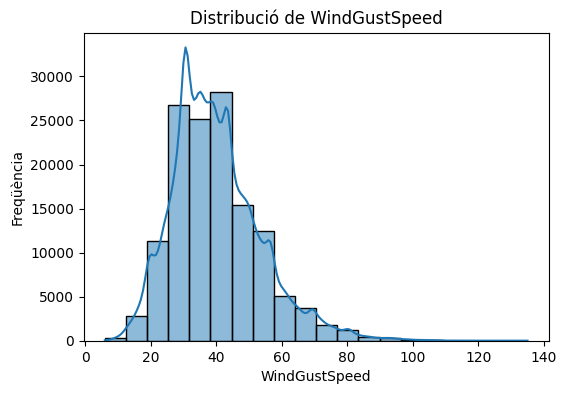

Variable: WindSpeed9am
  Mitjana: 14.04
  Desviació Estàndard: 8.92


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


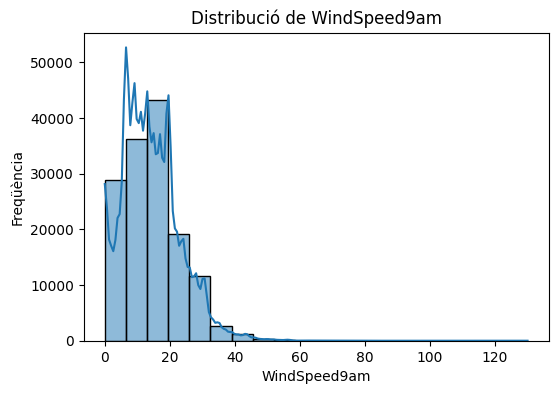

Variable: WindSpeed3pm
  Mitjana: 18.66
  Desviació Estàndard: 8.81


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


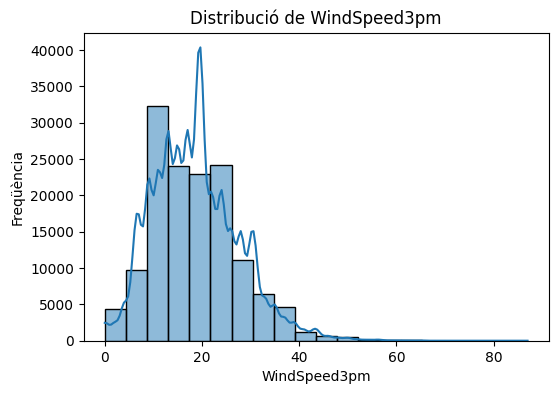

Variable: Humidity9am
  Mitjana: 68.88
  Desviació Estàndard: 19.03


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


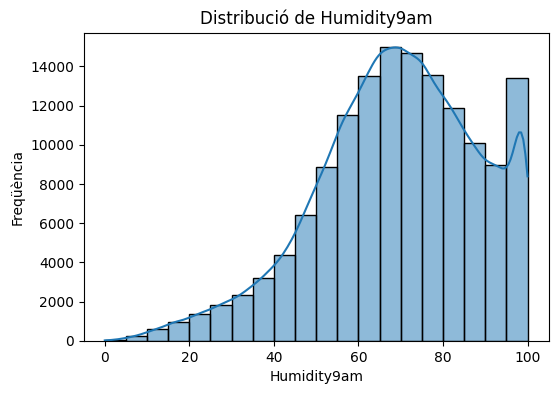

Variable: Humidity3pm
  Mitjana: 51.54
  Desviació Estàndard: 20.80


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


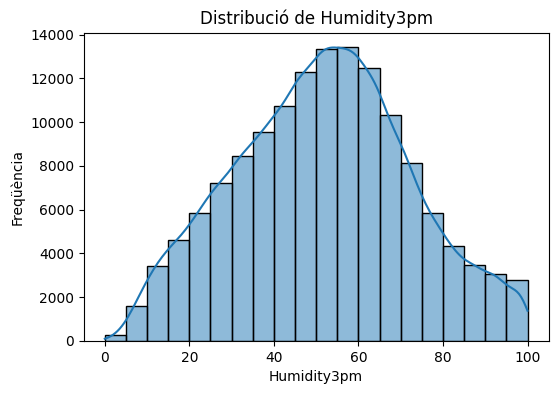

Variable: Pressure9am
  Mitjana: 1017.65
  Desviació Estàndard: 7.11


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


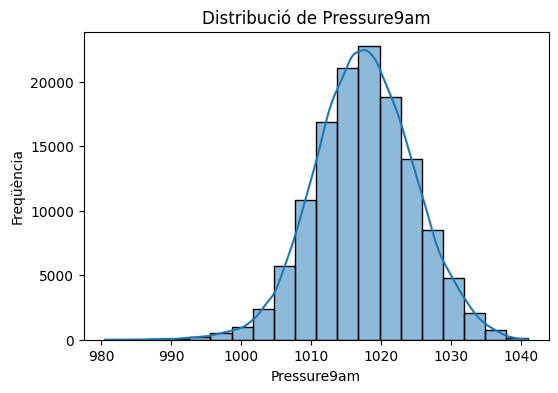

Variable: Pressure3pm
  Mitjana: 1015.26
  Desviació Estàndard: 7.04


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


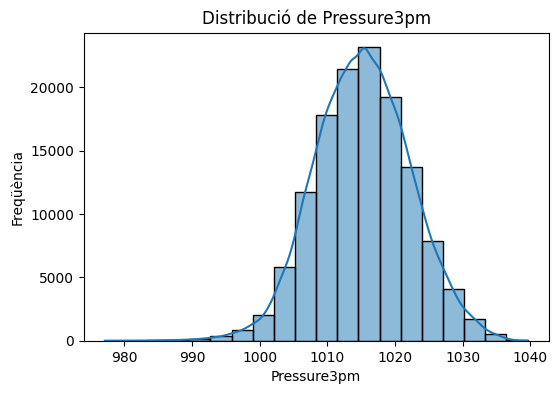

Variable: Cloud9am
  Mitjana: 4.45
  Desviació Estàndard: 2.89


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


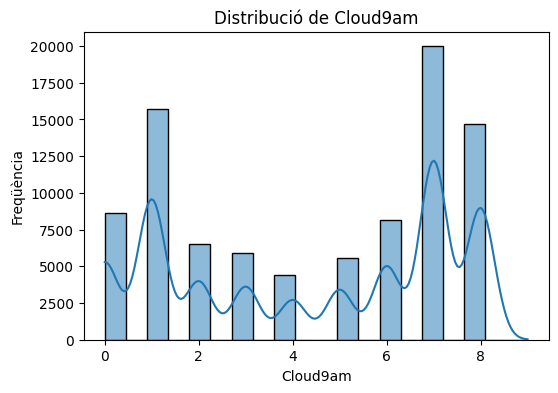

Variable: Cloud3pm
  Mitjana: 4.51
  Desviació Estàndard: 2.72


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


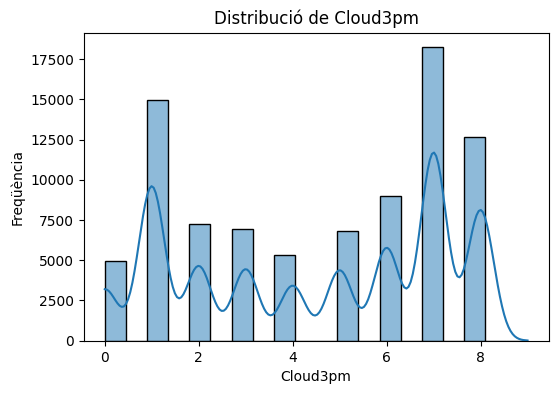

Variable: Temp9am
  Mitjana: 16.99
  Desviació Estàndard: 6.49


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


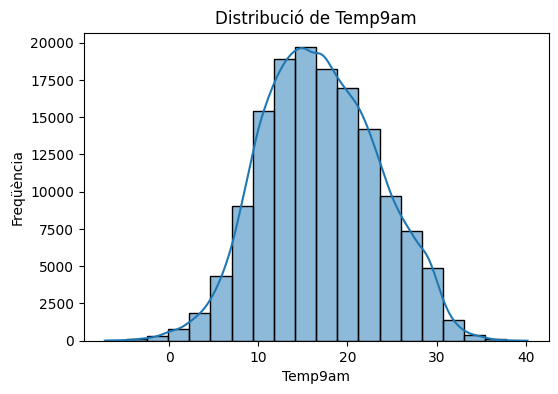

Variable: Temp3pm
  Mitjana: 21.68
  Desviació Estàndard: 6.94


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


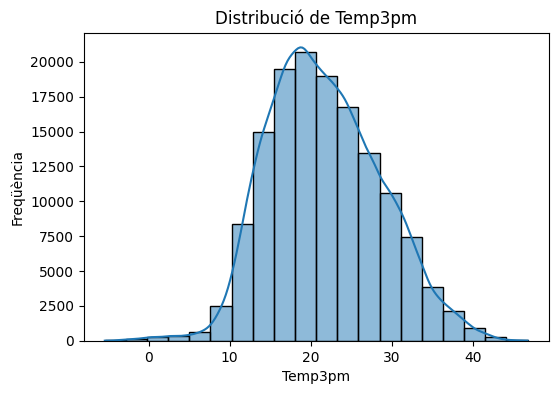

Number of categorical variables:  7
********************************************************************************
Categorical variables column name: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

KeyboardInterrupt: 

<Figure size 400x300 with 0 Axes>

In [6]:
var_num = [feature for feature in data.columns if data[feature].dtypes != 'object' and data[feature].dtypes != 'category' and data[feature].dtypes != 'bool']
print('Number of numerical variables: ', len(var_num))
print('*'*80)
print('Numerical Variables Column: ', var_num)

for column in var_num:
    mitjana = np.mean(data[column])
    desviacio_estandard = np.std(data[column])

    # Imprimir valores
    print(f"Variable: {column}")
    print(f"  Mitjana: {mitjana:.2f}")
    print(f"  Desviació Estàndard: {desviacio_estandard:.2f}")

    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=20, kde=True, edgecolor='black')
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()

var_cat = [feature for feature in data.columns if data[feature].dtypes == 'O' or data[feature].dtypes == 'category']
print('Number of categorical variables: ', len(var_cat))
print('*'*80)
print('Categorical variables column name:',var_cat)

for column in var_cat:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=column, hue=column, data=data, palette="gist_rainbow_r", legend=False)
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()

In [7]:
# Observem els valors únics de cada variables i d'aquí veiem quines són les categòriques i quines les numèriques. 

unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['col_name', 'unique']).sort_values(by=['unique'])
unique_counts

,col_name,unique
22,RainTomorrow,2
21,RainToday,2
18,Cloud3pm,10
17,Cloud9am,10
10,WindDir3pm,16
9,WindDir9am,16
7,WindGustDir,16
11,WindSpeed9am,43
12,WindSpeed3pm,44
1,Location,49


In [9]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## ANÀLISI BIVARIANT AMB LA VARIABLE OBJECTIU

#### BIVARIATE: Categòriques amb la variable objectiu

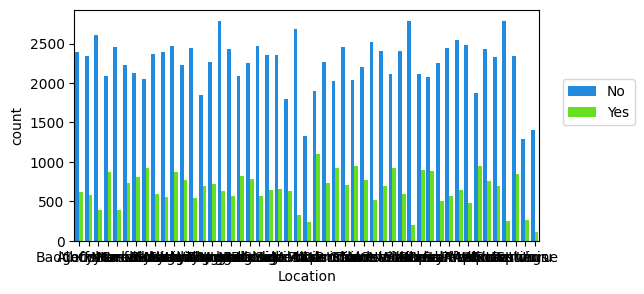

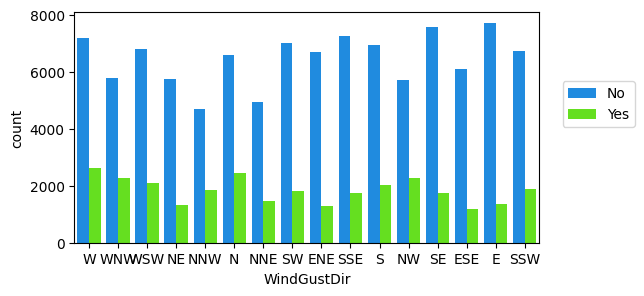

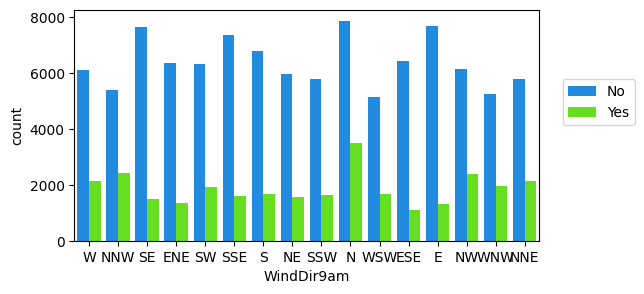

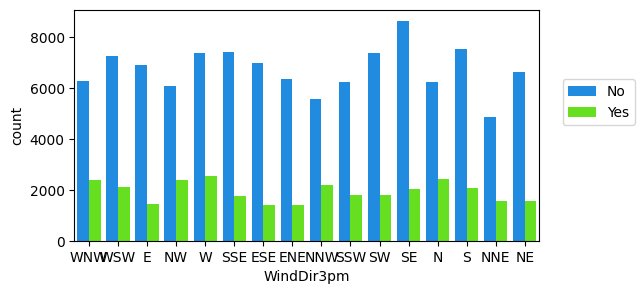

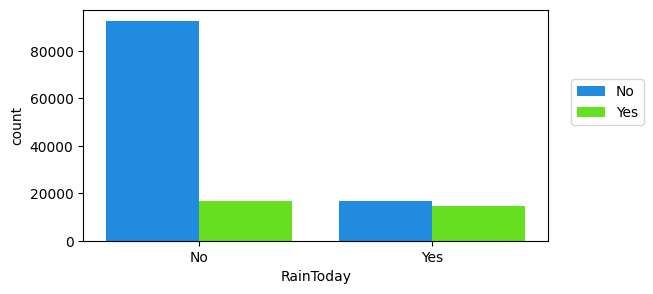

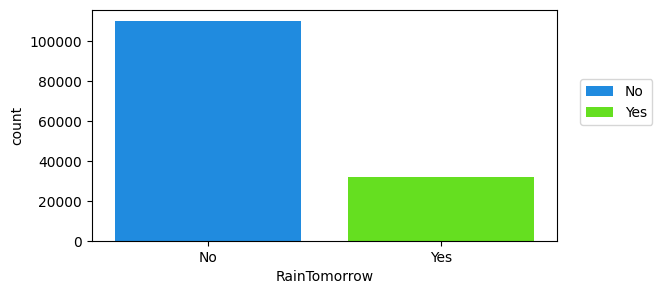

In [24]:
for variable in var_cat[1:]:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r')
    plt.legend(loc=(1.05, 0.5))
    plt.show()

#### BIVARIATE: numèriques amb la variable objectiu

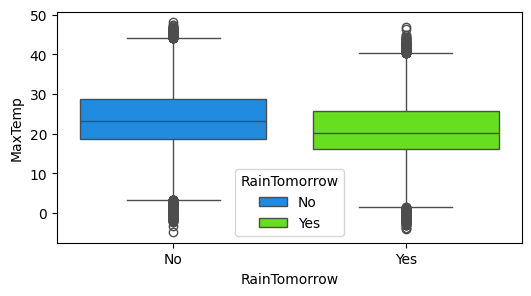

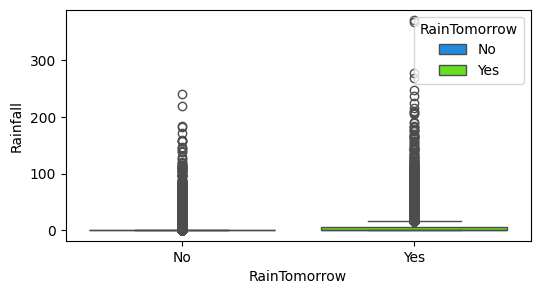

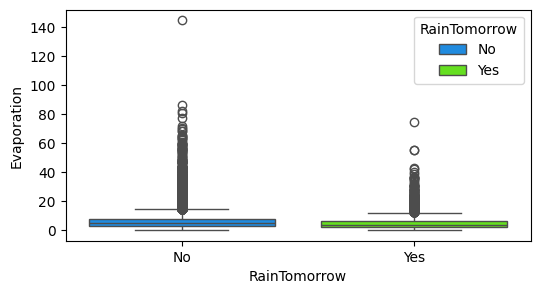

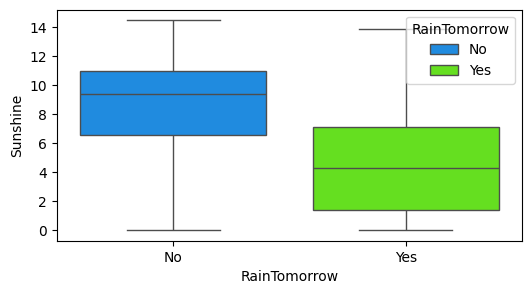

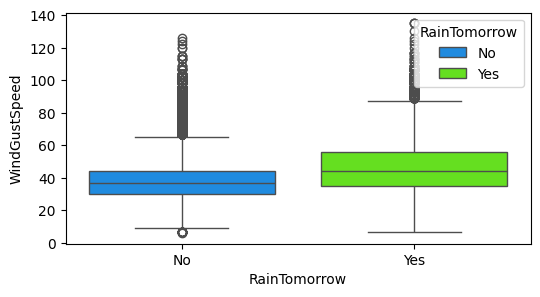

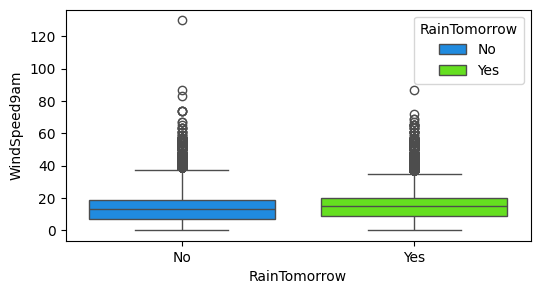

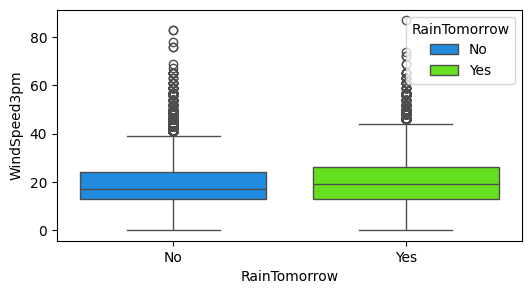

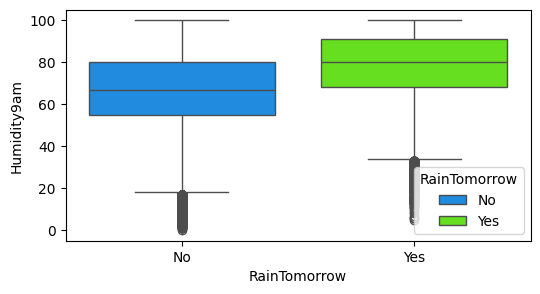

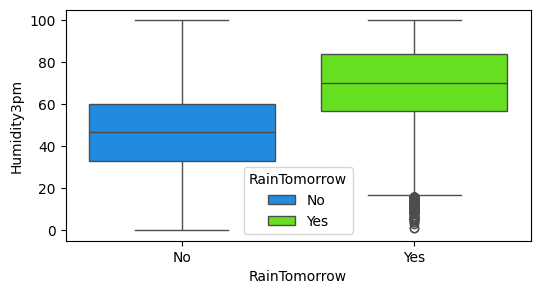

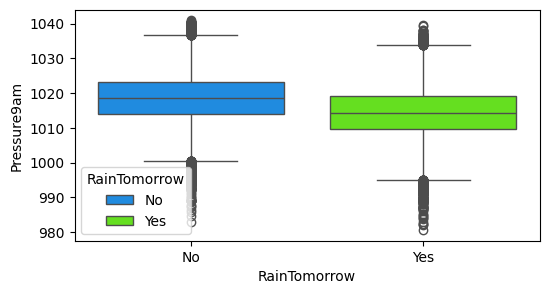

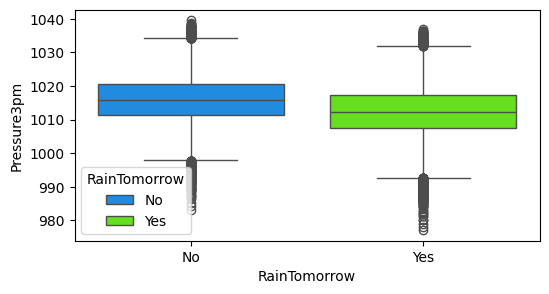

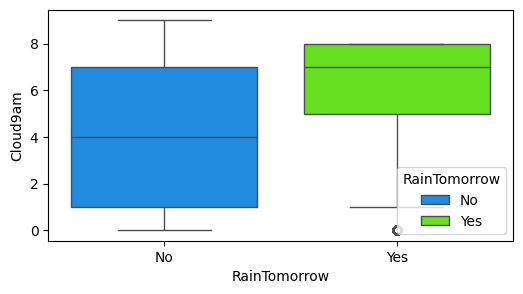

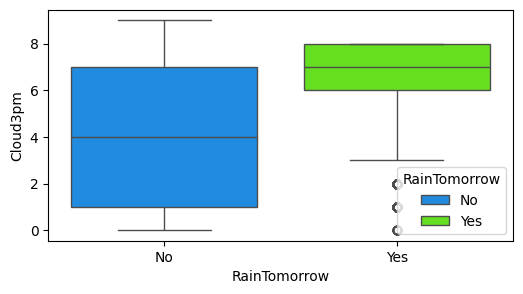

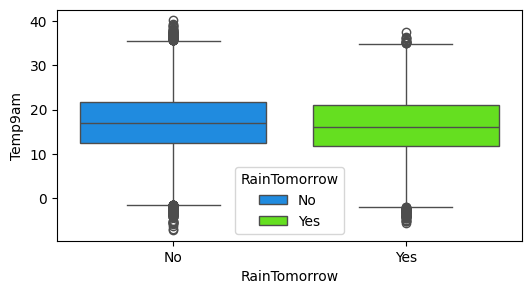

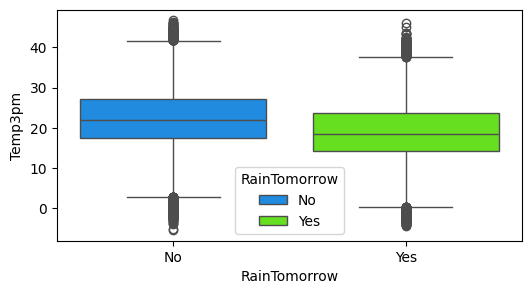

In [27]:
for variable in var_num[1:]:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.boxplot(data=data, x='RainTomorrow',hue='RainTomorrow', y=variable, palette='gist_rainbow_r')
    plt.show()

MATRIU DE CORRELACIÓ

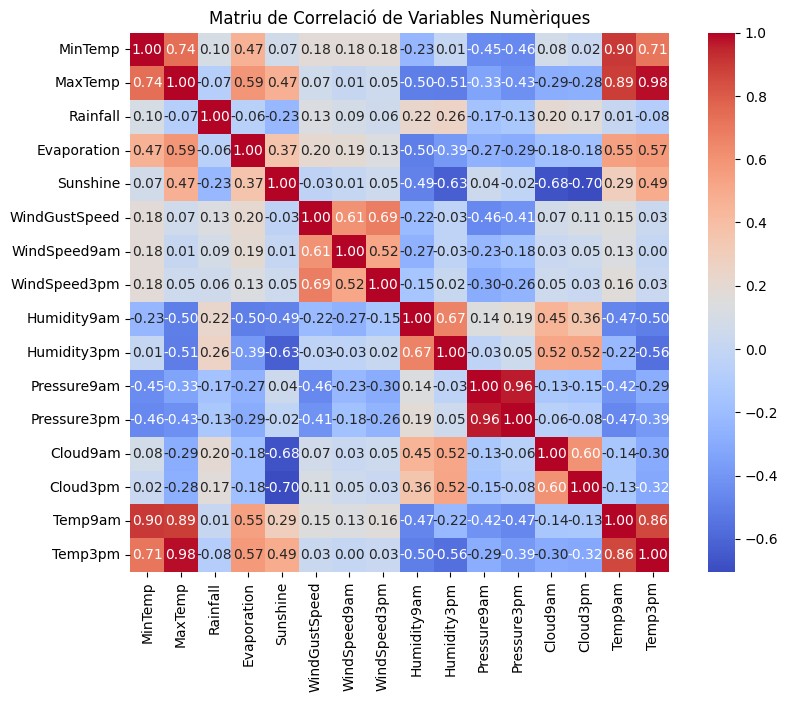

In [7]:
corr_matrix = data[var_num].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriu de Correlació de Variables Numèriques')
plt.show()

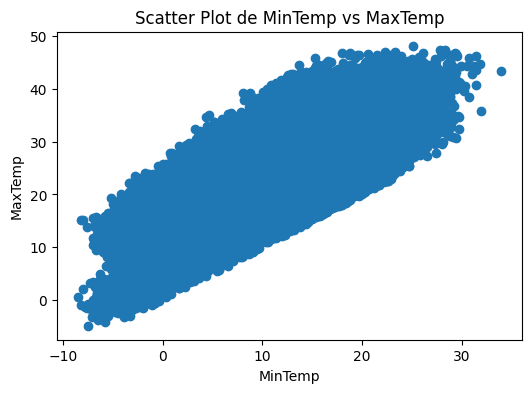

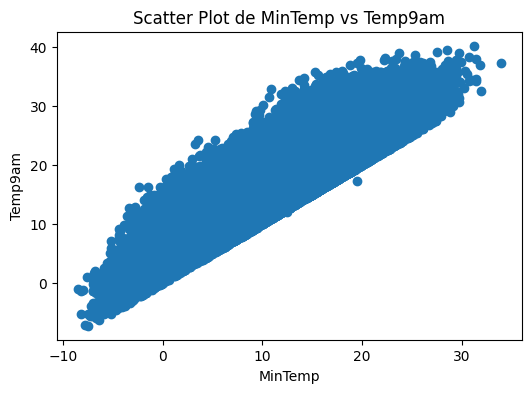

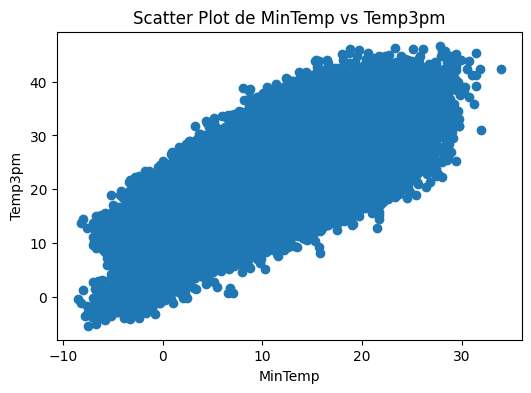

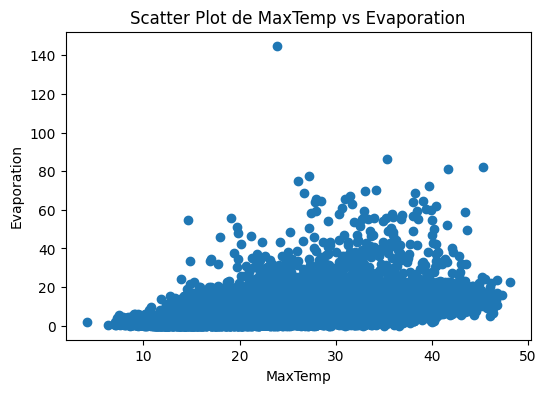

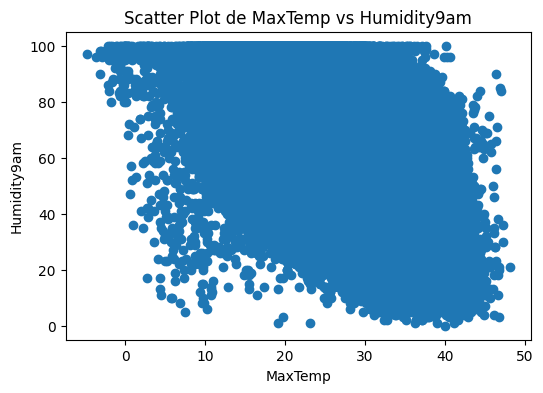

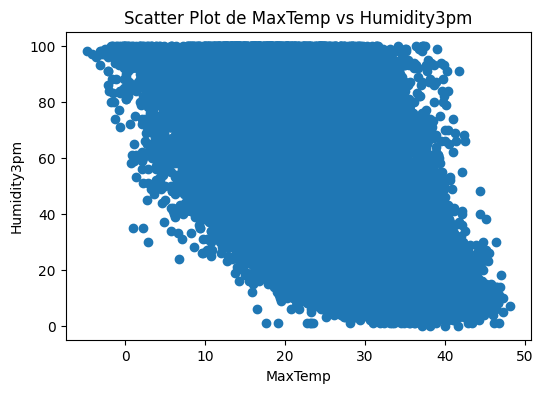

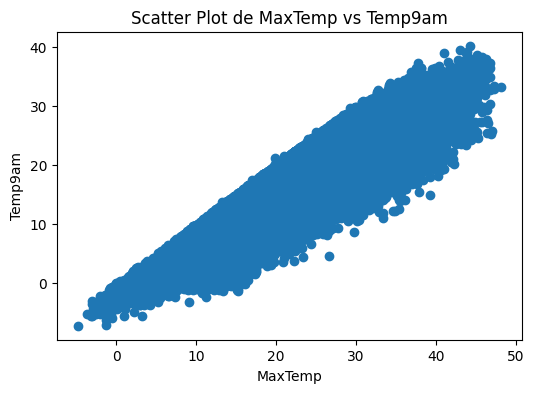

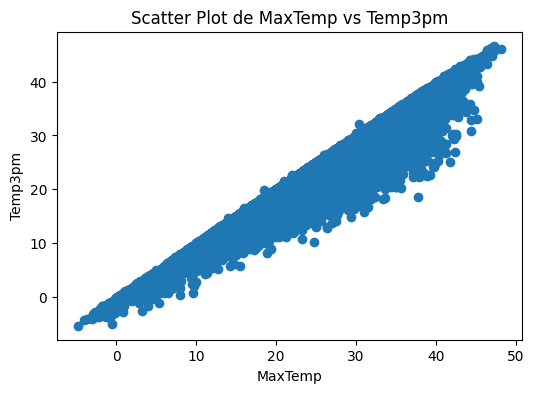

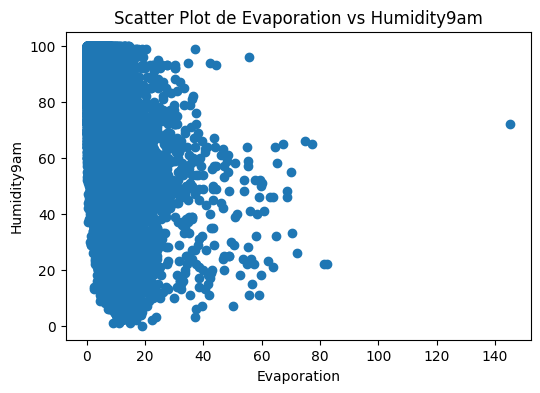

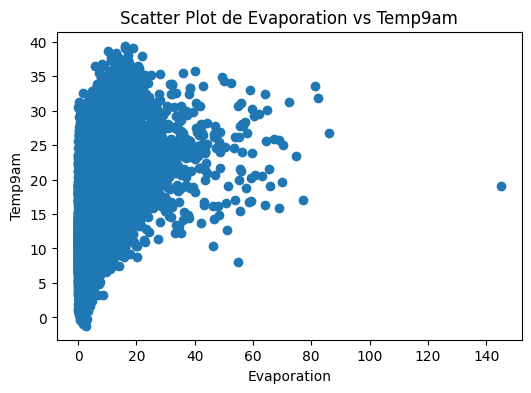

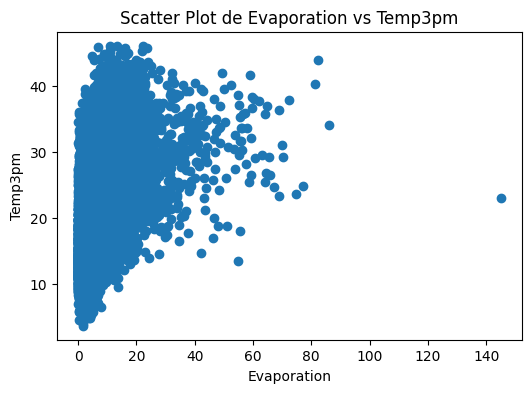

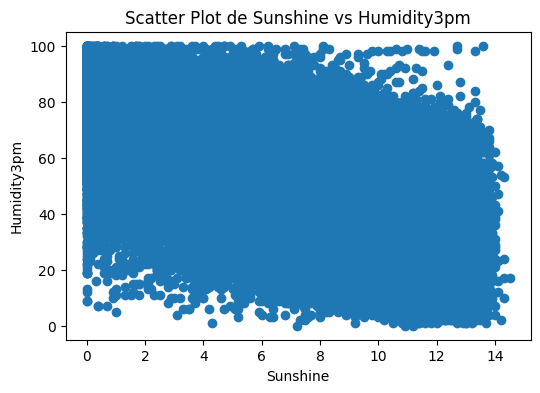

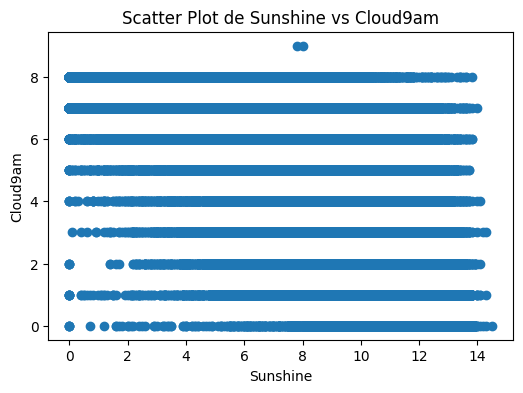

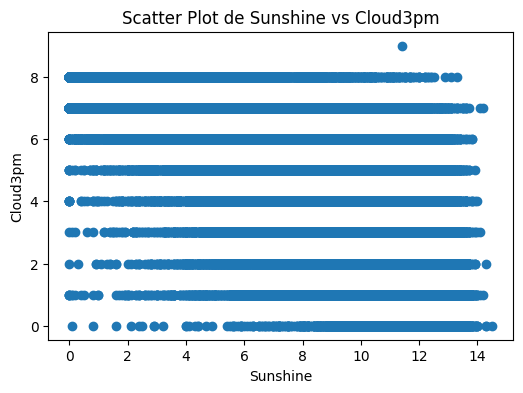

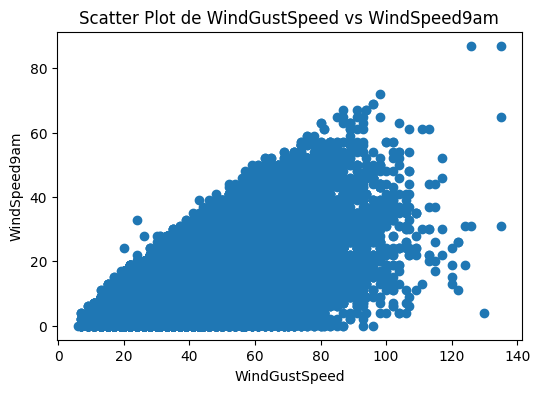

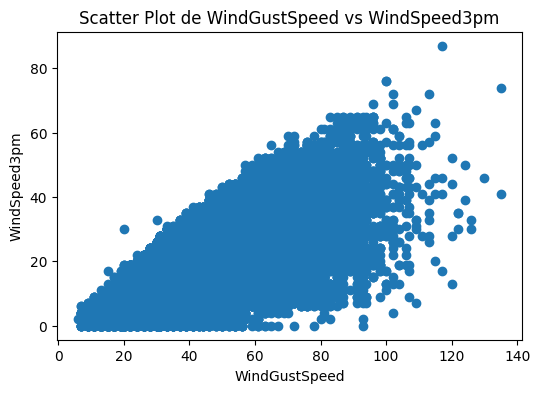

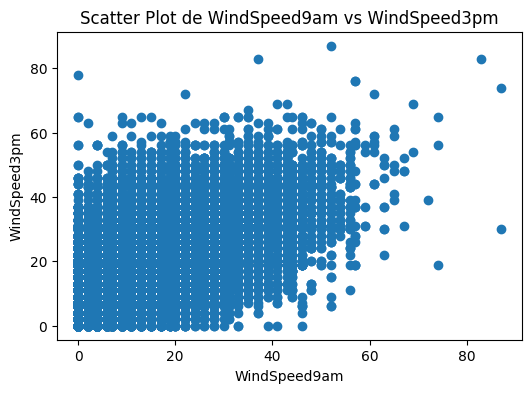

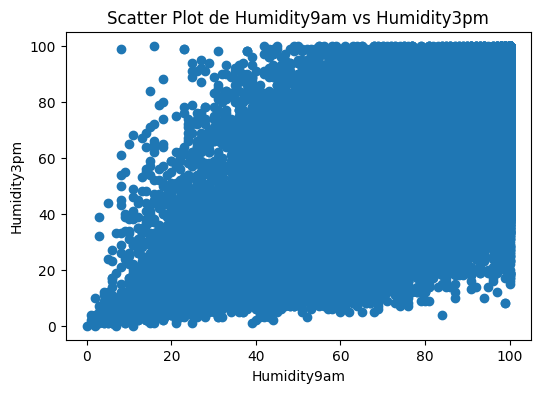

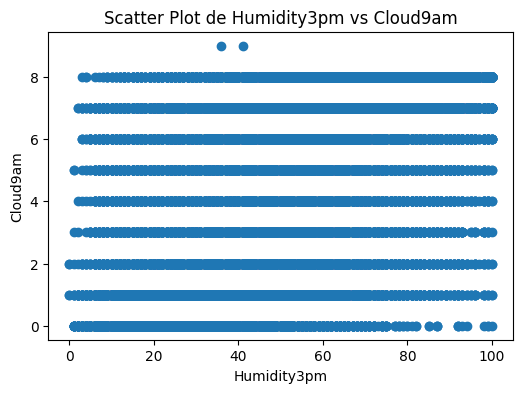

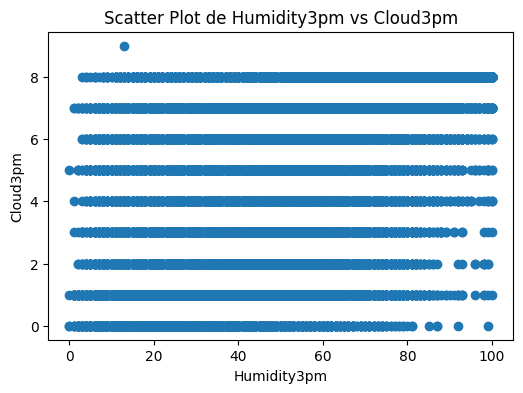

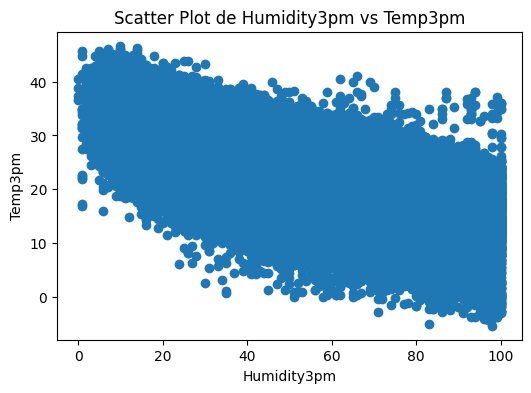

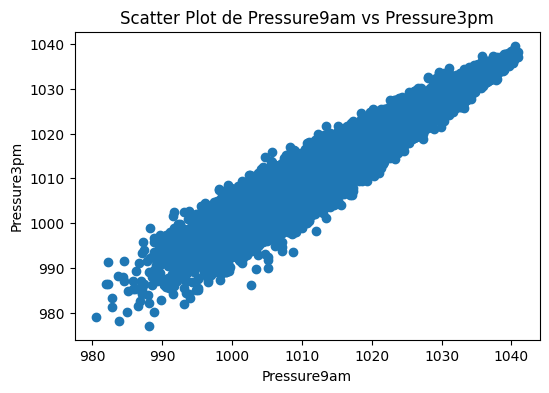

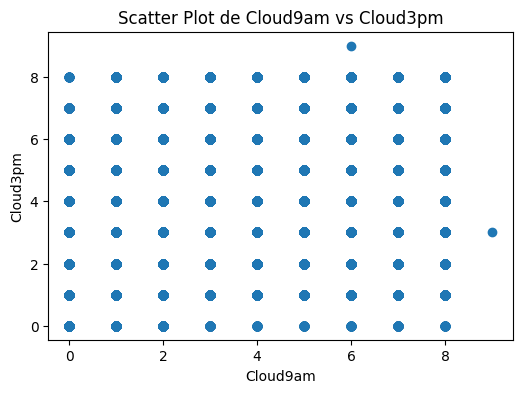

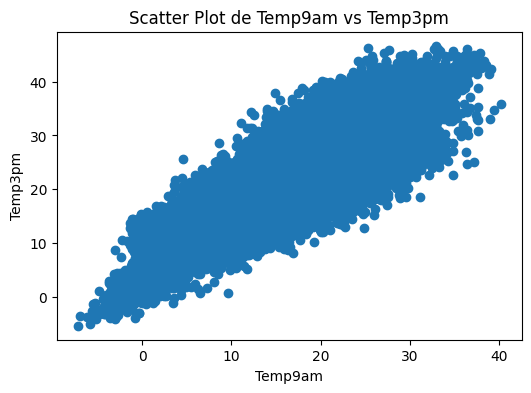

In [8]:
corr_matrix = data[var_num].corr().abs()

# Selecciona las parejas de variables con una correlación mayor a 0.5
umbral_correlacion = 0.5
parejas_alta_corr = np.where((np.triu(corr_matrix.values, k=1) < -umbral_correlacion) | (np.triu(corr_matrix.values, k=1) > umbral_correlacion))

for fila, columna in zip(*parejas_alta_corr):
    variable_x = corr_matrix.columns[fila]
    variable_y = corr_matrix.index[columna]
    plt.figure(figsize=(6, 4))
    plt.scatter(data[variable_x], data[variable_y])
    plt.title(f'Scatter Plot de {variable_x} vs {variable_y}')
    plt.xlabel(variable_x)
    plt.ylabel(variable_y)
    plt.show()


### RECODIFICACIÓ DE VARIABLES CATEGÒRIQUES

In [11]:
sum(data['Date'].isna())

0

In [12]:
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


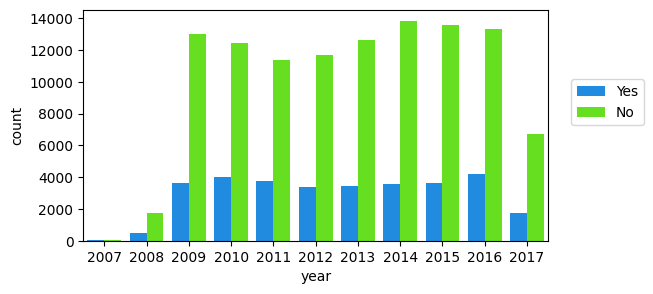

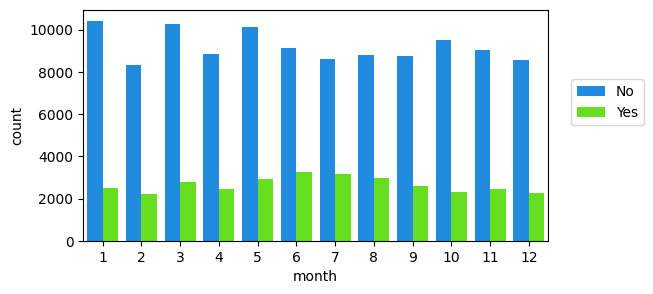

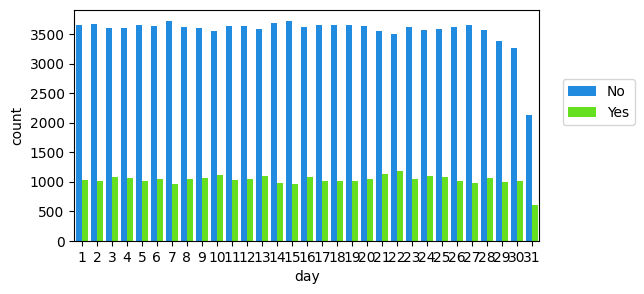

In [10]:
variables_temporals = ['year', 'month', 'day']
for variable in variables_temporals:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r')
    plt.legend(loc=(1.05, 0.5))
    plt.show()

Veiem que no hi ha canvis significatius en la variable objectiu per les temporals així que les eliminem

In [13]:
data = data.drop(columns=['Date'])
data = data.drop(columns=['day'])
data = data.drop(columns=['month'])
data = data.drop(columns=['year'])

IDENTIFICACIÓ I TRACTAMENT D'OUTLIERS

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


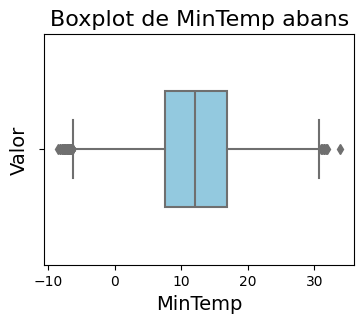

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


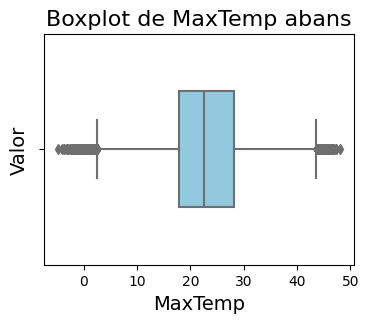

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


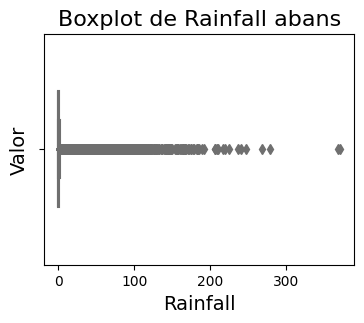

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


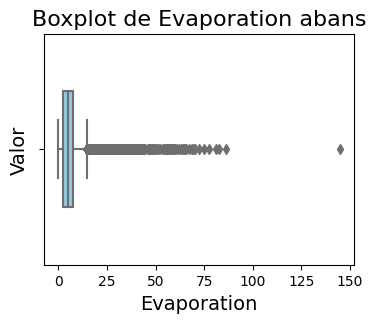

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


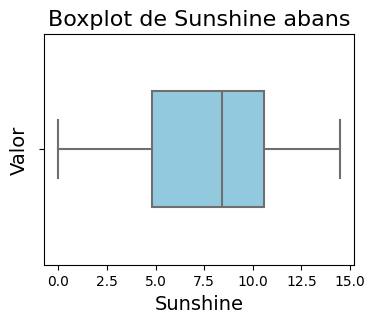

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


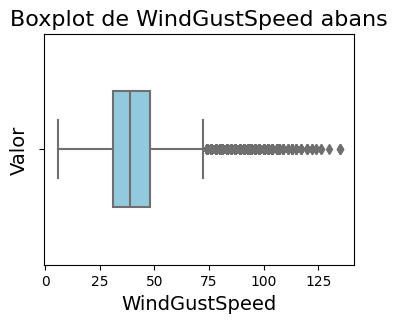

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


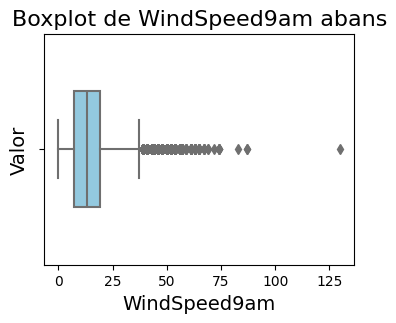

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


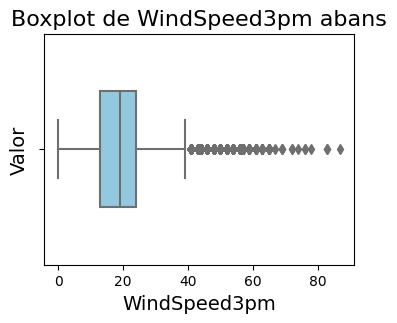

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


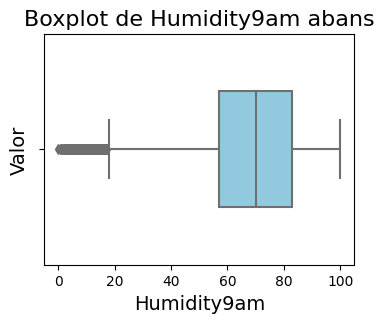

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


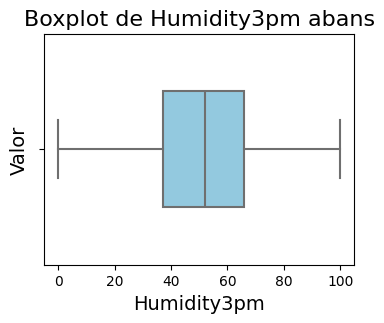

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


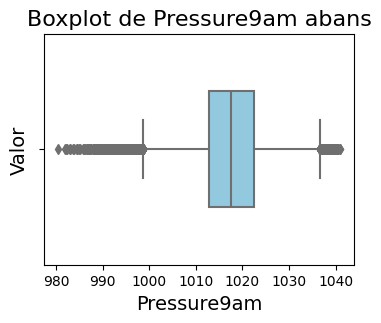

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


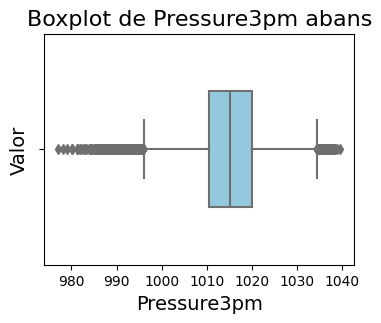

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


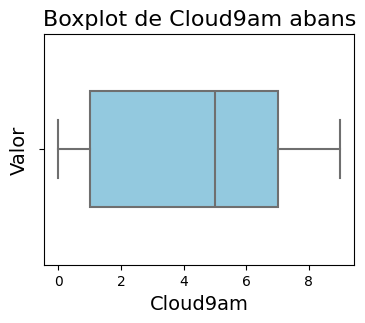

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


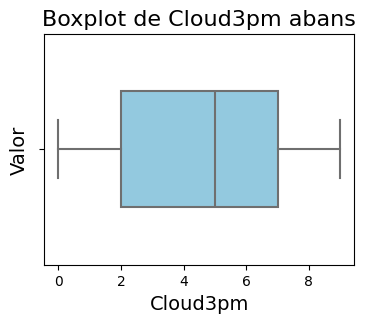

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


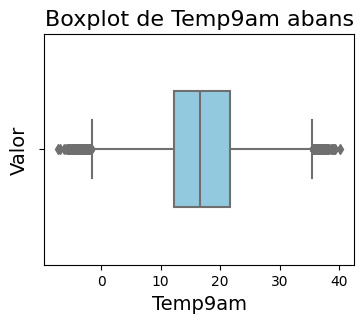

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


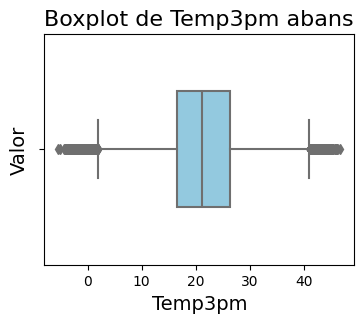

In [15]:
for columna in var_num:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=data[columna], color='skyblue', width=0.5)
    plt.title(f'Boxplot de {columna} abans', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.ylabel('Valor', fontsize=14)
    plt.show()

Veiem que tot i que hi ha valors extrems que poden considerar-se outliers, en tots els casos són mesures correctes que hem considerat necessàries pel model. Per tant, no eliminem cap outlier. 

IDENTIFICACIÓ I TRACTAMENT DE MISSING VALUES

In [16]:
# VISUALITZACIÓ DE MISSING VALUES

def data_explore(dataframe): # Per mirar més o menys quines variables tenen més missing values
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

In [17]:
data_explore(data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (145460, 22)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    14

Borrem les files que tenen missing data a RainTomorrow perquè llavors no podrem predir-la si no sabem el seu valor real. 

In [18]:
data = data.dropna(subset=['RainTomorrow'])

In [19]:
data_explore(data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (142193, 22)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 

Es probaran diferents tècniques d'imputació per veure quina és més eficaç

In [ ]:
# IMPUTACIÓ AMB LA MITJANA

def imputacio_mitjana(data1): # Assumint que tot són variables numèriques
    data = data1.copy()
    
    column_means = data.mean()
    data.fillna(column_means, inplace=True)
    
    return data

In [36]:
#IMPUTACIÓ PER KNN
from sklearn.impute import KNNImputer

# Fa falta haver codificat les variables categòriques
def imputacio_knn(data1):
    data = data1.copy()

    imputer_num = KNNImputer(n_neighbors=5)
    data = imputer_num.fit_transform(data)

    return data

In [13]:
from statsmodels.imputation.mice import MICE

# No fa falta fer onehotencoding abans si se li proporciona les variables numeriques i les categoriques
def imputacio_mice(data1, cat_vars, num_vars):
    data = data1.copy()

    imputer_mice = MICE(data, cat_vars=cat_vars, num_vars=num_vars, missing_values=np.nan,
                        sample_posterior=True, max_iter=50, random_state=42)
    data_imputada = imputer_mice.fit_transform()

    return data_imputada

In [14]:
def imputacio_moda(data1):
    data = data1.copy()

    for column in data.columns:
        moda = data[column].mode()[0]
        data[column] = data[column].fillna(moda)

    return data

BALANCEIG DE LES DADES

A l'anàlisi univariant i bivariant ja hem vist que la nostra variable a predir està molt balancejada

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

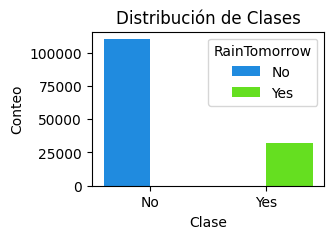

In [22]:
data['RainTomorrow'].value_counts()

plt.figure(figsize=(3, 2))
sns.countplot(x='RainTomorrow', hue='RainTomorrow', data=data, palette="gist_rainbow_r")
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

Probarem a fer undersampling i oversampling. Ens podem permetre fer undersampling ja que tenim una gran quantitat de dades. 

In [23]:
pip install imbalanced-learn scikit-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
from imblearn.under_sampling import RandomUnderSampler

def undersampling(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

In [25]:
from imblearn.over_sampling import RandomOverSampler

def random_oversampling(X, y):
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    return X_res, y_res

In [26]:
from imblearn.over_sampling import SMOTE

def smote_oversampling(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

#### ANÀLISI DE REDUNDÀNCIA

In [17]:
from scipy.stats import chi2_contingency

categoriques =  data.select_dtypes(include=['category', 'object']).columns.tolist()
for var in categoriques:

    contingency_table = pd.crosstab(data[var], data['RainTomorrow'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for {var}: chi2 = {chi2}, p-value = {p}")

Chi-square test for Location: chi2 = 3544.7901812833, p-value = 0.0
Chi-square test for WindGustDir: chi2 = 1519.9012419828084, p-value = 0.0
Chi-square test for WindDir9am: chi2 = 2214.8468820751004, p-value = 0.0
Chi-square test for WindDir3pm: chi2 = 1281.2667035163702, p-value = 5.6457492671966335e-264
Chi-square test for RainToday: chi2 = 13799.479649324368, p-value = 0.0
Chi-square test for RainTomorrow: chi2 = 142187.25042034165, p-value = 0.0


## MODEL LINEAL

Com a model lineal es fa una regressió logística ja que la nostra variable objectiu és binària.

In [31]:
def particio_dades(data):
    X = data.copy()
    X = X.drop('RainTomorrow', axis=1)
    y = data['RainTomorrow']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return  X_train, X_test, y_train, y_test

In [32]:
def recodificacio_one_hot(X_train, X_test, categoriques, numeriques):

    #Aquí igual eliminar variable del localització??
    encoder = OneHotEncoder(sparse_output=False)
    train_encoded = encoder.fit_transform(X_train[categoriques])
    test_encoded = encoder.transform(X_test[categoriques])
    X_train_combined = np.concatenate((X_train[numeriques], train_encoded), axis=1)
    X_test_combined = np.concatenate((X_test[numeriques], test_encoded), axis=1)
    return X_train_combined, X_test_combined

In [33]:
def normalitzacio_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_combined = scaler.fit_transform(X_train)
    X_test_combined = scaler.transform(X_test)
    return X_train_combined, X_test_combined

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support

def entrenament(data):
    X_train, X_test, y_train, y_test = particio_dades(data)

    numeriques = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
    
    X_train_encoded, X_test_encoded = recodificacio_one_hot(X_train, X_test, categoriques, numeriques)
    
    X_train_norm, X_test_norm = normalitzacio_standard(X_train_encoded, X_test_encoded)

    X_train_imputed = imputacio_knn(X_train_norm)
    X_test_imputed = imputacio_knn(X_test_norm) # Això no hauria d'entrenar-se amb el train i després només transform amb el test?

    # Aquí li podem posar el oversampling que volguem
    X_train_resampled, y_train_resampled = smote_oversampling(X_train_imputed, y_train)

    log_reg = LogisticRegression()
    log_reg.fit(X_train_resampled, y_train_resampled)

    y_pred = log_reg.predict(X_test_imputed)

    encoder = LabelEncoder()
    encoder.fit(y_test)

    # Transformar las etiquetas verdaderas y predichas
    y_true_encoded = encoder.transform(y_test)
    y_pred_encoded = encoder.transform(y_pred)

    # Calcular métricas (pos_label=1, porque LabelEncoder asigna 0, 1, 2,... a las etiquetas en orden alfabético)
    precision, recall, fscore, support = precision_recall_fscore_support(
        y_true_encoded, y_pred_encoded, beta=1.0, pos_label=1, average='binary'
    )

    print("Precision:", precision)
    print("Recall:", recall)
    print("F-Score:", fscore)
    print("Support:", support)

In [41]:
entrenament(data)

Precision: 0.5383767093074547
Recall: 0.7688188976377953
F-Score: 0.6332857698793617
Support: None


In [19]:
#ENTRENAMENT DEL MODEL
def entrenament(data1):
    X = data1.copy()
    X = X.drop('RainTomorrow', axis=1)
    y = data1['RainTomorrow']

    numeriques = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X.select_dtypes(include=['category', 'object']).columns.tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    '''RECODIFICACIO DE VARIABLES CATEGÒRIQUES'''
    encoder = OneHotEncoder(sparse_output=False)
    train_encoded = encoder.fit_transform(X_train[categoriques])
    test_encoded = encoder.transform(X_test[categoriques])

    X_train_combined = np.concatenate((X_train[numeriques], train_encoded), axis=1)
    X_test_combined = np.concatenate((X_test[numeriques], test_encoded), axis=1)

    '''NORMALITZACIÓ DE LES VARIABLES'''
    scaler = StandardScaler()
    X_train_combined = scaler.fit_transform(X_train_combined)
    X_test_combined = scaler.transform(X_test_combined)

    X_train_imputed = imputacio_knn(X_train_combined)
    X_test_imputed = imputacio_knn(X_test_combined)

    X_train_resampled, y_train_resampled = oversampling(X_train_imputed, y_train)

    log_reg = LogisticRegression()

    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_params = grid_search.best_params_
    print("Los mejores hiperparámetros encontrados son:", best_params)

    # Ajustar el modelo a los datos de entrenamiento
    log_reg.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = log_reg.predict(X_test_imputed)

    # Calcular la precisión del modelo
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Precisión del modelo:", accuracy)

    f1_score = metrics.f1_score(y_test, y_pred)
    print("F1 Score del modelo:", f1_score)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusión:")
    print(conf_matrix)

    return log_reg

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión logística
log_reg = LogisticRegression()

param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Los mejores hiperparámetros encontrados son:", best_params)

# Ajustar el modelo a los datos de entrenamiento
log_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular la precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

f1_score = metrics.f1_score(y_test, y_pred)
print("F1 Score del modelo:", f1_score)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

TypeError: '<' not supported between instances of 'float' and 'str'

# PERCEPTRÓ MULTICAPA

In [21]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, fashion_mnist

from keras.optimizers.legacy import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_covtype, fetch_california_housing
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

In [22]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training Accuracy')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')
  axes[1].set_title('Training and Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

In [25]:

# Load dataset
X = data.copy()
X = X.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

categoriques = X.select_dtypes(include=['category', 'object']).columns.tolist()
X = X.select_dtypes(exclude=['category', 'object'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Standardize features with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(2, activation='softmax')
])

# Define the optimizer and learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 1000
batch_size = 16
history = model.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot leaning curves
plot_curves(history)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).